# Partial Dependence Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

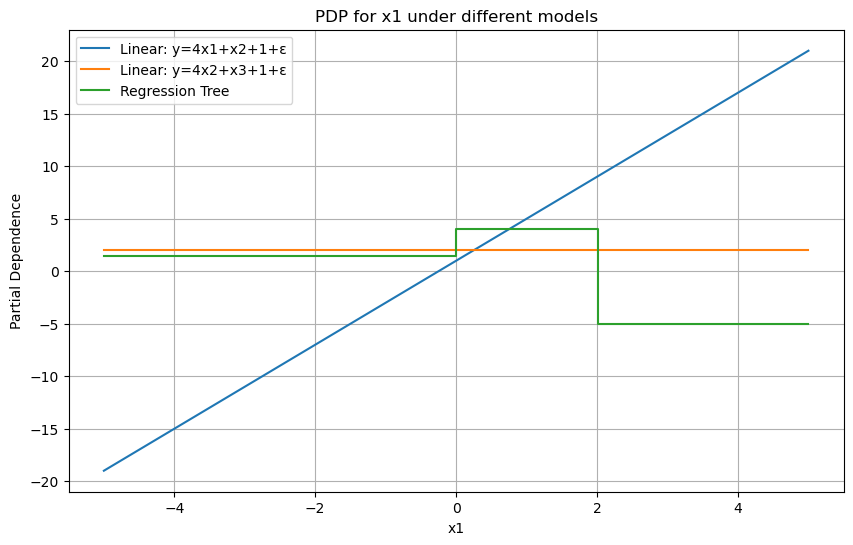

In [2]:

# Define feature space
gridx = np.linspace(-5, 5, 100)

# 1. Linear regression: y = 4x1 + x2 + 1 + e, e ~ N(0,2)
# PDP for x1 is just the expected value of y as a function of x1 (other vars average out)
# Since x2 is symmetric around 0 and noise is mean zero, PDP = 4*x1 + 1
pdp1 = 4*gridx + 1

# 2. Linear regression: y = 4x2 + x3 + 1 + e, e ~ N(1,3)
# No dependence on x1, so PDP is constant = E[y] = 1 (intercept) + E[error]=1
pdp2 = np.ones_like(gridx) * (1 + 1)  # intercept + mean of error

# 3. Regression tree:
# if x1 > 2 => y=-5
# else if x2 > 0 => y=3
# else if x1 > 0 => y=5
# else y=0

# To get PDP for x1, average predictions over all x2,x3 uniformly in [-5,5]

N = 20000
x2 = np.random.uniform(-5,5,N)
x3 = np.random.uniform(-5,5,N)

def tree_predict(x1, x2, x3):
    if x1 > 2:
        return -5
    elif x2 > 0:
        return 3
    elif x1 > 0:
        return 5
    else:
        return 0

pdp3 = []
for val in gridx:
    preds = [tree_predict(val, x2[i], x3[i]) for i in range(N)]
    pdp3.append(np.mean(preds))
pdp3 = np.array(pdp3)

# Plot all PDPs
plt.figure(figsize=(10,6))
plt.plot(gridx, pdp1, label='Linear: y=4x1+x2+1+ε')
plt.plot(gridx, pdp2, label='Linear: y=4x2+x3+1+ε')
plt.plot(gridx, pdp3, label='Regression Tree', drawstyle='steps-mid')
plt.xlabel('x1')
plt.ylabel('Partial Dependence')
plt.title('PDP for x1 under different models')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
np.random.seed(42)
n_samples = 5000
x2 = np.random.uniform(-5, 5, n_samples)
x3 = np.random.uniform(-5, 5, n_samples)

x1_grid = np.linspace(-5, 5, 200)

# PDP function
def pdp_for_model(model, x1_grid, x2, x3):
    pdp_vals = []
    for val in x1_grid:
        preds = model(val, x2, x3)
        pdp_vals.append(np.mean(preds))
    return np.array(pdp_vals)

# Models
# 1. Linear regression: y = 4x1 + x2 + 1 + ε, ε ~ N(0,2)
def model1(x1, x2, x3):
    return 4*x1 + x2 + 1  # expectation over noise

# 2. Linear regression: y = 4x2 + x3 + 1 + ε, ε ~ N(1,3)
def model2(x1, x2, x3):
    return 4*x2 + x3 + 1 + 1  # add mean of noise = 1

# 3. Regression tree

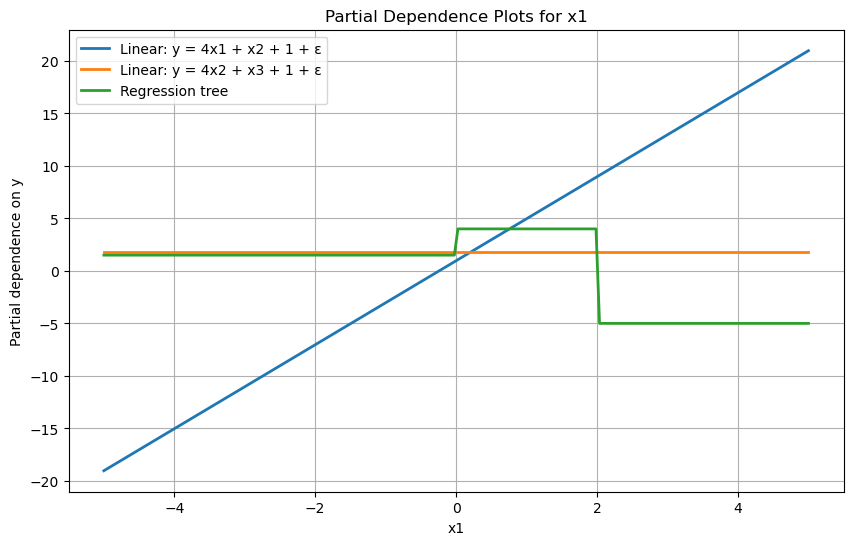

In [4]:
# Fix regression tree model so it can handle scalar x1 with vector x2, x3
def model3(x1, x2, x3):
    x1_arr = np.full_like(x2, x1)  # broadcast scalar x1 to match shape
    y = np.zeros_like(x2)
    cond1 = (x1_arr > 2)
    cond2 = (x2 > 0) & (~cond1)
    cond3 = (x1_arr > 0) & (~cond1) & (~cond2)
    y[cond1] = -5
    y[cond2] = 3
    y[cond3] = 5
    return y

# Recompute PDPs
pdp1 = pdp_for_model(model1, x1_grid, x2, x3)
pdp2 = pdp_for_model(model2, x1_grid, x2, x3)
pdp3 = pdp_for_model(model3, x1_grid, x2, x3)

# Plot again
plt.figure(figsize=(10,6))
plt.plot(x1_grid, pdp1, label="Linear: y = 4x1 + x2 + 1 + ε", lw=2)
plt.plot(x1_grid, pdp2, label="Linear: y = 4x2 + x3 + 1 + ε", lw=2)
plt.plot(x1_grid, pdp3, label="Regression tree", lw=2)
plt.xlabel("x1")
plt.ylabel("Partial dependence on y")
plt.title("Partial Dependence Plots for x1")
plt.legend()
plt.grid(True)
plt.show()


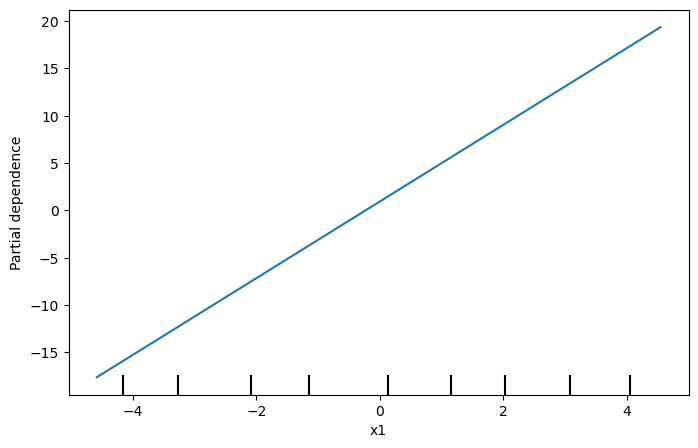

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay

# Seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 500
x1 = np.random.uniform(-5, 5, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)
x3 = np.random.uniform(-5, 5, n_samples)
epsilon = np.random.normal(0, 2, n_samples)

y = 4*x1 + x2 + 1 + epsilon

# Combine features into a single array
X = np.column_stack((x1, x2, x3))

# Train linear regression
model = LinearRegression()
model.fit(X, y)

# Draw PDP for x1
fig, ax = plt.subplots(figsize=(8,5))
PartialDependenceDisplay.from_estimator(model, X, features=[0], feature_names=['x1','x2','x3'], ax=ax)
plt.show()
